In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor, AdaBoostRegressor

from sklearn.metrics import mean_squared_error,median_absolute_error

In [49]:
df = pd.read_csv("/content/drive/MyDrive/Proyecto/cleaned_data.csv")
df.head(5)

,ESTADO_CLIENTE,EDAD,GENERO,NUM_PERSONASCARGO,CATEGORIA_INGRESOS,NUM_PRODUCTOS,MESES_INACTIVOS_12_MESES,CONTACTOS_CONTADOS_12_MESES,LIMITE_CREDITO,TOTAL_DEUDA,...,NIVEL_EDUCATIVO_Post Graduado,NIVEL_EDUCATIVO_Sin Educacion,NIVEL_EDUCATIVO_Universidad,ESTADO_CIVIL_Casado,ESTADO_CIVIL_Divorciado,ESTADO_CIVIL_Soltero,CATEGORIA_TARJETA_Azul,CATEGORIA_TARJETA_Dorada,CATEGORIA_TARJETA_Plateada,CATEGORIA_TARJETA_Platino
0,1,45,0,3,2,5,1,3,12691.0,777,...,0,0,0,1,0,0,1,0,0,0
1,1,49,1,5,0,6,1,2,8256.0,864,...,0,0,0,0,0,1,1,0,0,0
2,1,51,0,3,3,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,40,1,4,0,3,4,1,3313.0,2517,...,0,0,0,1,0,0,1,0,0,0
4,1,40,0,3,2,5,1,0,4716.0,0,...,0,1,0,1,0,0,1,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTADO_CLIENTE                  10127 non-null  int64  
 1   EDAD                            10127 non-null  int64  
 2   GENERO                          10127 non-null  int64  
 3   NUM_PERSONASCARGO               10127 non-null  int64  
 4   CATEGORIA_INGRESOS              10127 non-null  int64  
 5   NUM_PRODUCTOS                   10127 non-null  int64  
 6   MESES_INACTIVOS_12_MESES        10127 non-null  int64  
 7   CONTACTOS_CONTADOS_12_MESES     10127 non-null  int64  
 8   LIMITE_CREDITO                  10127 non-null  float64
 9   TOTAL_DEUDA                     10127 non-null  int64  
 10  PROMEDIO_DISPUESTO_GASTAR       10127 non-null  float64
 11  VALOR_TOTAL_TRANSACCION         10127 non-null  int64  
 12  NUMERO_TRANSACCIONES            

# 1. Division De datos

El objetivo del analisis es predecir la cantidad que va a comprar un cliente esto con el fin de tomar de decisiones de marketing.

In [51]:
X = df.drop("VALOR_TOTAL_TRANSACCION", axis=1)
y= df["VALOR_TOTAL_TRANSACCION"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"la longitud de X es {X_train.shape} y la longitud de y {y_train.shape}")

la longitud de X es (7088, 26) y la longitud de y (7088,)


# Escalamiento de los datos

En este paso del proceso transformaremos nuestros datos para que se encuentre entre 0 y 1. Usando el algoritmo MinMax el cual identifica el valor mayor y le asigna el valor 1 y el valor menor le asigna el valor 0. el resto de los datos se tranforman usando operaciones aritmeticas

In [52]:
escalador_x = preprocessing.MinMaxScaler()
escalador_y = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(escalador_x.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(escalador_x.transform(X_test), columns=X_test.columns)
y_train=escalador_y.fit_transform(y_train.values.reshape(-1,1))
y_test = escalador_y.transform(y_test.values.reshape(-1,1))
X_train.head(5)

,ESTADO_CLIENTE,EDAD,GENERO,NUM_PERSONASCARGO,CATEGORIA_INGRESOS,NUM_PRODUCTOS,MESES_INACTIVOS_12_MESES,CONTACTOS_CONTADOS_12_MESES,LIMITE_CREDITO,TOTAL_DEUDA,...,NIVEL_EDUCATIVO_Post Graduado,NIVEL_EDUCATIVO_Sin Educacion,NIVEL_EDUCATIVO_Universidad,ESTADO_CIVIL_Casado,ESTADO_CIVIL_Divorciado,ESTADO_CIVIL_Soltero,CATEGORIA_TARJETA_Azul,CATEGORIA_TARJETA_Dorada,CATEGORIA_TARJETA_Plateada,CATEGORIA_TARJETA_Platino
0,1.0,0.547619,0.0,0.4,0.50,0.4,0.333333,0.000000,0.200700,0.780691,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.833333,1.0,0.0,0.00,0.6,0.333333,0.333333,0.212763,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.023810,0.0,0.0,0.75,0.0,0.166667,0.500000,1.000000,0.449344,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.619048,1.0,0.2,0.00,0.0,0.166667,0.500000,0.048422,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.428571,1.0,0.6,0.00,0.2,0.500000,0.500000,0.023874,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


Vamos a escalar los datos sin datos sin dividirlos para validacion cruzada.

In [53]:
X_escalado = pd.DataFrame(escalador_x.fit_transform(X), columns=X.columns)
y_escalado=escalador_y.fit_transform(y.values.reshape(-1,1))

# Modelado

Como la variable que queremos predecir es una variable continua nustro problema es un problema de regresion. Vamos a usar modelos supervisados, mas especificamente los adaptados a la regresion de la libreria de scikit-learn



In [54]:
#Este diccionario almacenara el rendimiento de cada uno de los modelos que se estaran provando
rendimiento={}

In [55]:
Ks=[]
errores_cuadraticos_medios =[]

for i in range(1,100):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)

  y_pred = knn.predict(X_test)
  ecm = mean_squared_error(y_test, y_pred)

  Ks.append(i)
  errores_cuadraticos_medios.append(ecm)

Text(0.5, 1.0, 'Rendimiento del modelo por cada k')

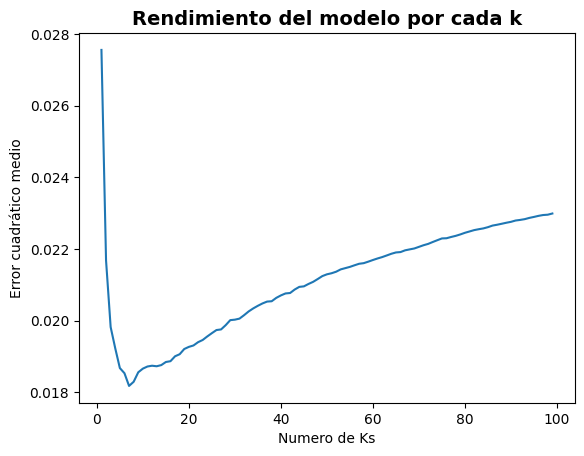

In [56]:
fig, ax = plt.subplots()
ax.plot(Ks,errores_cuadraticos_medios)

plt.ylabel('Error cuadrático medio')
plt.xlabel('Numero de Ks')
plt.title('Rendimiento del modelo por cada k',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [57]:
#vamos a buscar el numero mas pequeño en la lista errores_cuadraticos_medios
numero_pequeño = 100
pocision = 0 #La pocision donde se encuentra el numero mas pequeño
for i in range(0,len(errores_cuadraticos_medios)):
  if errores_cuadraticos_medios[i] < numero_pequeño:
    numero_pequeño = errores_cuadraticos_medios[i]
    pocision = i

print(f"El error cuadratico medio mas pequeño es {numero_pequeño} pertenciente al k numero {Ks[pocision]}")

El error cuadratico medio mas pequeño es 0.018176418679787 pertenciente al k numero 7


In [58]:
knn=KNeighborsRegressor(n_neighbors=Ks[pocision])
knn_param={'weights':['uniform','distance'],"p":[1,2]}

grid_search = GridSearchCV(knn,knn_param , cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_escalado, y_escalado)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=7),
             param_grid={'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'p': 2, 'weights': 'distance'}

In [60]:
knn = KNeighborsRegressor(n_neighbors=Ks[pocision],p=2,weights='distance')
print(f'Se entreno con k = {Ks[pocision]}')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

ecm = mean_squared_error(y_test, y_pred)
ecm = escalador_y.inverse_transform(ecm.reshape(-1,1))[0][0]
eam = median_absolute_error(y_test,y_pred)
eam = escalador_y.inverse_transform(eam.reshape(-1,1))[0][0]
error = np.sqrt(ecm)

print("Error cuadrático medio (MSE):", ecm)
print("Error absoluto medio (MAE):", eam)
print("El error es ", error)

rendimiento["KNN"]=error

Se entreno con k = 7
Error cuadrático medio (MSE): 831.3615338759256
Error absoluto medio (MAE): 1350.1892231566321
El error es  28.833340664514157


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(knn, X_escalado, y_escalado, cv=kf, scoring="neg_mean_squared_error")

scores_final = list(map(lambda x:escalador_y.inverse_transform(x.reshape(-1,1))[0][0]*-1,scores))

print("Scores de validación cruzada:", scores_final)
print("error cuadratico medio:", np.mean(scores_final))
print("El error promedio es: ",np.sqrt( -1*np.mean(scores_final)))

Scores de validación cruzada: [-166.58063971927987, -191.90245822495442, -200.66341695319642, -167.9173339133134, -160.57950077824083]
error cuadratico medio: -177.528669917797
El error promedio es:  13.32398851387215


# Arbol de decision

In [62]:
profundidades = []
ecms = []

for i in range(0,21):
  if i==0:
    arbol_regresor = DecisionTreeRegressor()
    arbol_regresor.fit(X_train,y_train)

    y_pred = arbol_regresor.predict(X_test)

    ecm = mean_squared_error(y_test, y_pred)

    ecms.append(ecm)
    profundidades.append(i)

  else:
    arbol_regresor = DecisionTreeRegressor(max_depth=i)
    arbol_regresor.fit(X_train,y_train)

    y_pred = arbol_regresor.predict(X_test)

    ecm = mean_squared_error(y_test, y_pred)

    ecms.append(ecm)
    profundidades.append(i)

Text(0.5, 1.0, 'Rendimiento del modelo por cada nivel de profundidad')

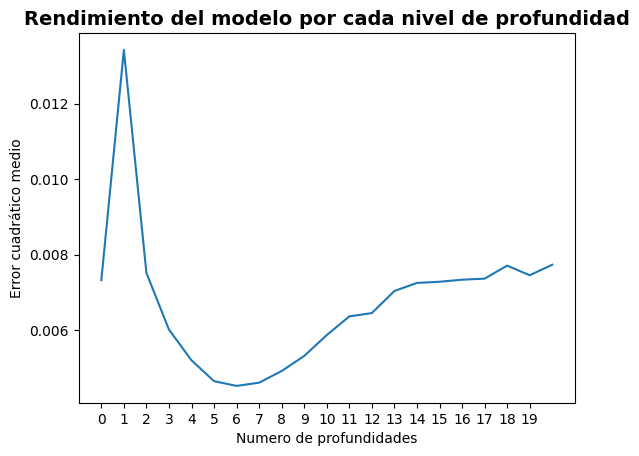

In [63]:
fig, ax = plt.subplots()
ax.plot(profundidades,ecms)
ax.set_xticks(range(0, 20))

plt.ylabel('Error cuadrático medio')
plt.xlabel('Numero de profundidades')
plt.title('Rendimiento del modelo por cada nivel de profundidad',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [64]:
#vamos a buscar el numero mas pequeño en la lista errores_cuadraticos_medios
numero_pequeño = 100000
pocision = 0 #La pocision donde se encuentra el numero mas pequeño
for i in range(0,len(ecms)):
  if ecms[i] < numero_pequeño:
    numero_pequeño = ecms[i]
    pocision = i

print(f"El error cuadratico medio mas pequeño es {numero_pequeño} pertenciente a la profundidad numero {profundidades[pocision]}")

El error cuadratico medio mas pequeño es 0.0045250077202606395 pertenciente a la profundidad numero 6


In [65]:
arbol=DecisionTreeRegressor(max_depth=profundidades[pocision])
arbol_param={'min_samples_split':(10,11,12,13),"min_samples_leaf":(32,33,34,35),"max_features":(9,10)}

arbol_busqueda = GridSearchCV(arbol,arbol_param , cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
arbol_busqueda.fit(X_escalado, y_escalado)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=6),
             param_grid={'max_features': (9, 10),
                         'min_samples_leaf': (32, 33, 34, 35),
                         'min_samples_split': (10, 11, 12, 13)},
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
arbol_busqueda.best_params_

{'max_features': 10, 'min_samples_leaf': 34, 'min_samples_split': 10}

In [67]:
arbol_regresor = DecisionTreeRegressor(max_depth=profundidades[pocision], min_samples_leaf=34,max_features= 9,min_samples_split=12)
print(f"Estamos usando un maximo de profundidad de {profundidades[pocision]}")
arbol_regresor.fit(X_train,y_train)

y_pred = arbol_regresor.predict(X_test)

ecm = mean_squared_error(y_test, y_pred)
ecm = escalador_y.inverse_transform(ecm.reshape(-1,1))[0][0]
eam = median_absolute_error(y_test,y_pred)
eam = escalador_y.inverse_transform(eam.reshape(-1,1))[0][0]
error = np.sqrt(ecm)

print("Error cuadrático medio (MSE):", ecm)
print("Error absoluto medio (MAE):", eam)
print("El error es ", error)

rendimiento["Arbol Decision"]=error

Estamos usando un maximo de profundidad de 6
Error cuadrático medio (MSE): 593.7993842994372
Error absoluto medio (MAE): 934.7165991902832
El error es  24.36799918539553


In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(arbol_regresor, X_escalado, y_escalado, cv=kf, scoring="neg_mean_squared_error")

scores_final = list(map(lambda x:escalador_y.inverse_transform(x.reshape(-1,1))[0][0]*-1,scores))

print("Scores de validación cruzada:", scores_final)
print("error cuadratico medio:", np.mean(scores_final))
print("El error promedio es: ",np.sqrt( -1 * np.mean(scores_final)))

Scores de validación cruzada: [-411.16184745890854, -407.315803826277, -292.8244139424231, -397.83733057825486, -315.04574851314027]
error cuadratico medio: -364.83702886380075
El error promedio es:  19.100707548774228


# Bosque Aleatorio

In [69]:
profundidades = []
ecms_bosque = []

for i in range(0,21):
  if i==0:
    bosque_regresor =  RandomForestRegressor(n_estimators=100,min_samples_split=2,random_state=1)
    bosque_regresor.fit(X_train,np.ravel(y_train))

    y_pred = bosque_regresor.predict(X_test)

    ecm = mean_squared_error(y_test, y_pred)

    ecms_bosque.append(ecm)
    profundidades.append(i)

  else:
    bosque_regresor =  RandomForestRegressor(n_estimators=100,max_depth=i,min_samples_split=2,random_state=1)
    bosque_regresor.fit(X_train,np.ravel(y_train))

    y_pred = bosque_regresor.predict(X_test)

    ecm = mean_squared_error(y_test, y_pred)

    ecms_bosque.append(ecm)
    profundidades.append(i)

Text(0.5, 1.0, 'Rendimiento del modelo por cada nivel de profundidad')

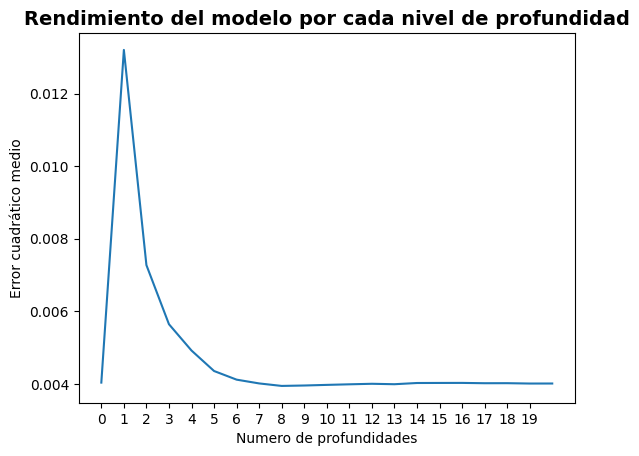

In [70]:
fig, ax = plt.subplots()
ax.plot(profundidades,ecms_bosque)
ax.set_xticks(range(0, 20))

plt.ylabel('Error cuadrático medio')
plt.xlabel('Numero de profundidades')
plt.title('Rendimiento del modelo por cada nivel de profundidad',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [71]:
#vamos a buscar el numero mas pequeño en la lista errores_cuadraticos_medios
numero_pequeño = 100000
pocision = 0 #La pocision donde se encuentra el numero mas pequeño
for i in range(0,len(ecms_bosque)):
  if ecms_bosque[i] < numero_pequeño:
    numero_pequeño = ecms_bosque[i]
    pocision = i

print(f"El error cuadratico medio mas pequeño es {numero_pequeño} pertenciente a la profundidad numero {profundidades[pocision]}")

El error cuadratico medio mas pequeño es 0.003943485727202294 pertenciente a la profundidad numero 8


In [72]:
print(ecms_bosque)

[0.004034767176728085, 0.013201380260378036, 0.007272584694386913, 0.005643441522855555, 0.004918774239552942, 0.00435453920843507, 0.004116311243925755, 0.004012252462031164, 0.003943485727202294, 0.003954964239338972, 0.003972056875133669, 0.003987895292178332, 0.004002397060310332, 0.003990447369329761, 0.00402384717121733, 0.004025519348844817, 0.004026601707308788, 0.004017879875972465, 0.004018960795067648, 0.004009231993146477, 0.004009983639834546]


In [73]:
bosque_aleatorio = RandomForestRegressor(n_estimators=100,max_depth=profundidades[pocision],min_samples_split=2,random_state=1)
print(f"Se entreno el modelo con {profundidades[pocision]} profundidades")

Se entreno el modelo con 8 profundidades


In [74]:
bosque_aleatorio.fit(X_train,np.ravel(y_train))

y_pred = bosque_aleatorio.predict(X_test)

ecm = mean_squared_error(y_test, y_pred)
ecm = escalador_y.inverse_transform(ecm.reshape(-1,1))[0][0]
eam = median_absolute_error(y_test,y_pred)
eam = escalador_y.inverse_transform(eam.reshape(-1,1))[0][0]
error = np.sqrt(ecm)

print("Error cuadrático medio (MSE):", ecm)
print("Error absoluto medio (MAE):", eam)
print("El error es ", error)

rendimiento["Bosque Aleatorio"]=error

Error cuadrático medio (MSE): 580.880212460734
Error absoluto medio (MAE): 869.4486203433459
El error es  24.101456646035608


In [75]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(bosque_aleatorio, X_escalado, np.ravel(y_escalado), cv=kf, scoring="neg_mean_squared_error")

scores_final = list(map(lambda x:escalador_y.inverse_transform(x.reshape(-1,1))[0][0]*-1,scores))

print("Scores de validación cruzada:", scores_final)
print("error cuadratico medio:", np.mean(scores_final))
print("El error promedio es: ",np.sqrt( -1*np.mean(scores_final)))

Scores de validación cruzada: [-432.0653343630163, -446.8369424582555, -437.2244943892553, -436.0154195200138, -441.30745732059677]
error cuadratico medio: -438.6899296102275
El error promedio es:  20.94492610658313


In [78]:
pd.DataFrame.from_dict(rendimiento, orient='index', columns=['Error'])

,Error
KNN,28.833341
Arbol Decision,24.367999
Bosque Aleatorio,24.101457
Regresor votacion,24.935515
